Check Python version

In [1]:
!python --version

Python 3.9.18


Import libraries

In [1]:
import json
import yaml
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from darts import TimeSeries
from darts.utils.missing_values import missing_values_ratio, fill_missing_values

### **Extract Data**

In [3]:
# Local directory
#data_dir = '../datasets/climate'
#file_name = 'temp_anom_w_forcing'
#data_dir = '../datasets/finance'
#file_name = 'Returns_short_interest_data_train'
#file_path = f'{data_dir}/{file_name}.csv'

In [4]:
#dataset = pd.read_csv(file_path)

In [5]:
data_path = '/home/studio-lab-user/sagemaker-studiolab-notebooks/temporai/'
data_name = 'ILINet.csv'

In [6]:
dataset = pd.read_csv(data_path + data_name)

In [7]:
dataset.shape

(1305, 12)

In [8]:
dataset.columns

Index(['DATE', '% WEIGHTED ILI', '%UNWEIGHTED ILI', 'AGE 0-4', 'AGE 25-49',
       'AGE 25-64', 'AGE 5-24', 'AGE 50-64', 'AGE 65', 'ILITOTAL',
       'NUM. OF PROVIDERS', 'TOTAL PATIENTS'],
      dtype='object')

In [9]:
dataset.head()

,DATE,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,1997-10-12,1.10148,1.21686,179.0,NaN,157.0,205.0,NaN,29.0,570.0,192.0,46842.0
1,1997-10-19,1.20007,1.28064,199.0,NaN,151.0,242.0,NaN,23.0,615.0,191.0,48023.0
2,1997-10-26,1.37876,1.23906,228.0,NaN,153.0,266.0,NaN,34.0,681.0,219.0,54961.0
3,1997-11-02,1.19920,1.14473,188.0,NaN,193.0,236.0,NaN,36.0,653.0,213.0,57044.0
4,1997-11-09,1.65618,1.26112,217.0,NaN,162.0,280.0,NaN,41.0,700.0,213.0,55506.0


In [10]:
dataset['DATE'] = pd.to_datetime(dataset['DATE'])

In [11]:
dataset.tail()

,DATE,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
1300,2022-09-11,2.02422,1.94821,12548.0,6978.0,NaN,13475.0,2701.0,2632.0,38334.0,3324.0,1967653.0
1301,2022-09-18,2.03228,1.97359,13386.0,6709.0,NaN,14467.0,2599.0,2435.0,39596.0,3316.0,2006289.0
1302,2022-09-25,2.28328,2.20031,15904.0,6877.0,NaN,16571.0,2633.0,2473.0,44458.0,3329.0,2020531.0
1303,2022-10-02,2.36912,2.30242,16977.0,6869.0,NaN,16622.0,2764.0,2633.0,45865.0,3335.0,1992031.0
1304,2022-10-09,2.56561,2.56080,17521.0,10009.0,NaN,18196.0,3716.0,3458.0,52900.0,3356.0,2065759.0


In [12]:
col_list = ['% WEIGHTED ILI', '%UNWEIGHTED ILI', 'AGE 0-4', 'AGE 25-49',
       'AGE 25-64', 'AGE 5-24', 'AGE 50-64', 'AGE 65', 'ILITOTAL',
       'NUM. OF PROVIDERS', 'TOTAL PATIENTS']

In [13]:

series = TimeSeries.from_dataframe(dataset, 'DATE', col_list)
series_filled = fill_missing_values(series)
df_filled = series_filled.pd_dataframe().reset_index()

Define the required time and target columns

In [14]:
time_col = dataset.columns[0]
target_col = dataset.columns[-1]
dataset[time_col] = dataset[time_col].astype(str)

Change target column to float

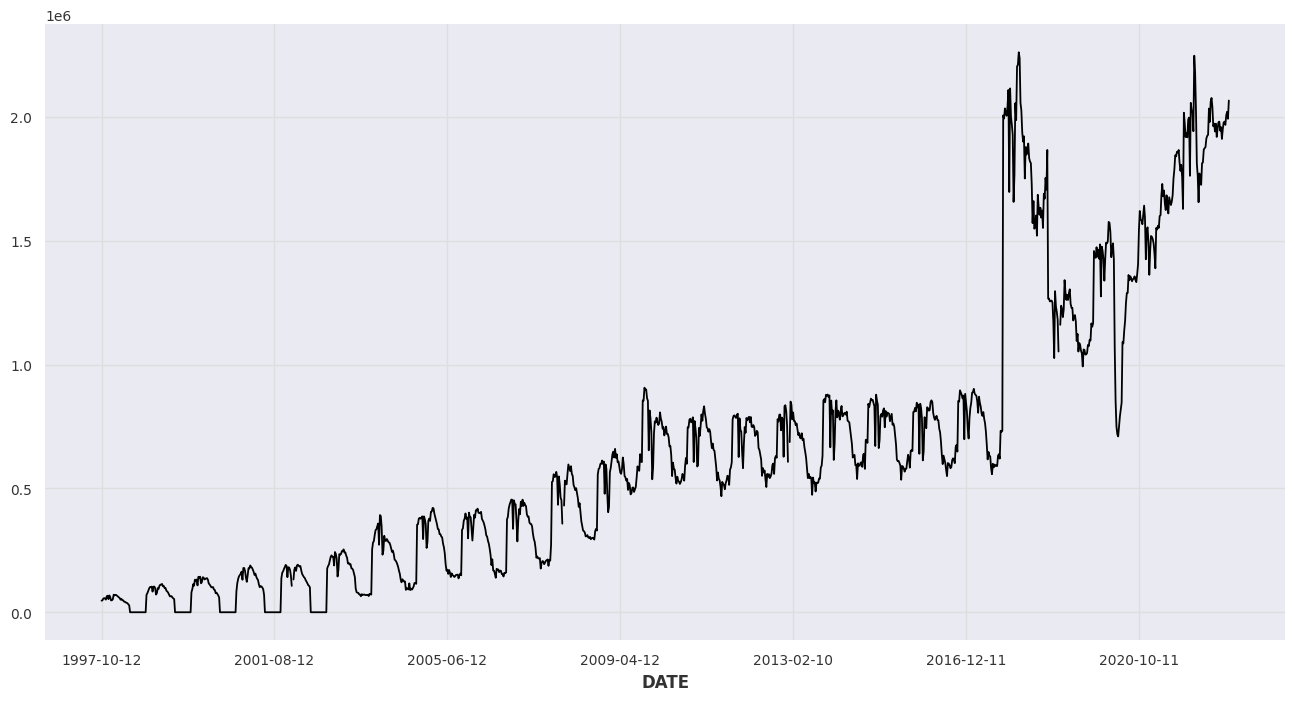

In [15]:
figsize = (16, 8)
dataset.set_index(time_col)[target_col].plot(figsize=figsize);

<Axes: xlabel='DATE'>

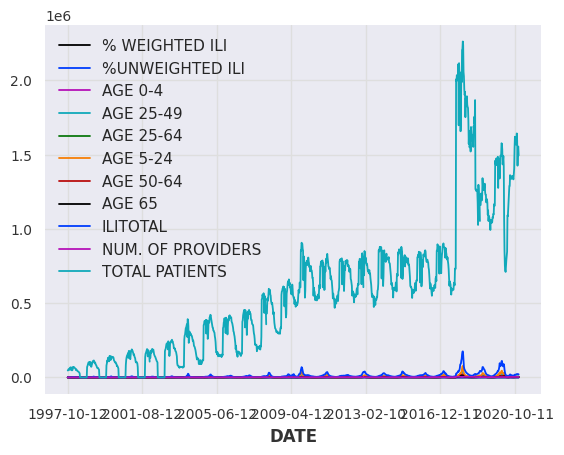

In [16]:
dataset[dataset.DATE < '2021'].set_index(time_col).plot()

<Axes: xlabel='DATE'>

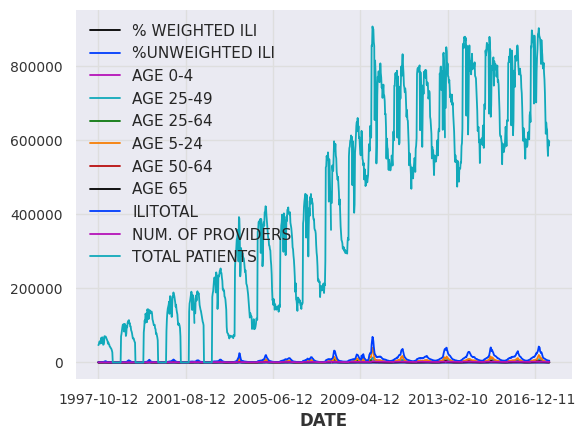

In [17]:
dataset[dataset.DATE < '2017-08'].set_index(time_col).plot()

In [18]:
# trim the anomaly part
dataset_partial = df_filled[df_filled.DATE < '2017-08']

In [19]:
dataset_partial

component,DATE,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,1997-10-12,1.101480,1.216860,179.0,0.0,157.0,205.0,0.0,29.0,570.0,192.0,46842.0
1,1997-10-19,1.200070,1.280640,199.0,0.0,151.0,242.0,0.0,23.0,615.0,191.0,48023.0
2,1997-10-26,1.378760,1.239060,228.0,0.0,153.0,266.0,0.0,34.0,681.0,219.0,54961.0
3,1997-11-02,1.199200,1.144730,188.0,0.0,193.0,236.0,0.0,36.0,653.0,213.0,57044.0
4,1997-11-09,1.656180,1.261120,217.0,0.0,162.0,280.0,0.0,41.0,700.0,213.0,55506.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1029,2017-07-02,0.859531,0.961603,1771.0,1121.0,6090.0,1748.0,489.0,467.0,5596.0,1422.0,581945.0
1030,2017-07-09,0.818998,0.955818,1728.0,1111.0,6090.0,1564.0,505.0,418.0,5326.0,1456.0,557219.0
1031,2017-07-16,0.752505,0.827597,1545.0,1004.0,6090.0,1578.0,462.0,372.0,4961.0,1405.0,599446.0
1032,2017-07-23,0.731146,0.811886,1549.0,908.0,6090.0,1421.0,450.0,419.0,4747.0,1384.0,584688.0


In [20]:
dataset_partial['DATE'] = dataset_partial['DATE'].astype('str')

/tmp/ipykernel_697/1473158665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_partial['DATE'] = dataset_partial['DATE'].astype('str')


In [21]:
;# dataset[target_col] = dataset[target_col].astype(float)

In [22]:
# dataset.head()

Split dataset into train and test sets

In [23]:
train_size = 0.8
train_points = int(train_size*len(dataset_partial))
train_df = dataset_partial.iloc[:train_points]
test_df = dataset_partial.iloc[train_points:]

Plot graph

In [24]:
train_df['DATE'] = train_df['DATE'].astype('str')

/tmp/ipykernel_697/1870464413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['DATE'] = train_df['DATE'].astype('str')


### **Train API**

Train data: convert df to list-of-list

In [25]:
train_data = []
for value in train_df.values:
    train_data.append(list(value))

In [26]:
train_data[:2]

[['1997-10-12',
  1.10148,
  1.21686,
  179.0,
  0.0,
  157.0,
  205.0,
  0.0,
  29.0,
  570.0,
  192.0,
  46842.0],
 ['1997-10-19',
  1.20007,
  1.28064,
  199.0,
  0.0,
  151.0,
  242.0,
  0.0,
  23.0,
  615.0,
  191.0,
  48023.0]]

Custom Model Request (optional)

In [27]:
# Default model request
model_request = {
    'type': 'meta_lr',  # 'meta_wa'
    'scorers': ['smape', 'mape'],
    'params': {
        'preprocessors': [
            {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
            {'type': 'minmaxscaler'},
        ],
        'base_models': [
            # {'type': 'darts_rnn'},
            {'type': 'darts_lightgbm'},  # TODO: Need to fix use of covariates lags
            # {'type': 'darts_autotheta'},
            # {'type': 'darts_autoarima'},
            # {'type': 'darts_autoets'},
            # {'type': 'stats_autotheta'},
            # {'type': 'stats_autoarima'},
            # {'type': 'stats_autoets'},
        ],
    },
}

# Customized model request
# model_request = {
#     'type': 'meta_wa',
#     'scorers': ['smape', 'mape'],
#     'param': {
#         'base_models': [
#             {'type': 'darts_autoarima'},
#             {'type': 'darts_autotheta'},
#             {'type': 'darts_autoets'},
#             {'type': 'stats_autotheta'},
#         ],
#     },
# }

Train API JSON Payload

In [28]:
train_data

[['1997-10-12',
  1.10148,
  1.21686,
  179.0,
  0.0,
  157.0,
  205.0,
  0.0,
  29.0,
  570.0,
  192.0,
  46842.0],
 ['1997-10-19',
  1.20007,
  1.28064,
  199.0,
  0.0,
  151.0,
  242.0,
  0.0,
  23.0,
  615.0,
  191.0,
  48023.0],
 ['1997-10-26',
  1.37876,
  1.23906,
  228.0,
  0.0,
  153.0,
  266.0,
  0.0,
  34.0,
  681.0,
  219.0,
  54961.0],
 ['1997-11-02',
  1.1992,
  1.14473,
  188.0,
  0.0,
  193.0,
  236.0,
  0.0,
  36.0,
  653.0,
  213.0,
  57044.0],
 ['1997-11-09',
  1.65618,
  1.26112,
  217.0,
  0.0,
  162.0,
  280.0,
  0.0,
  41.0,
  700.0,
  213.0,
  55506.0],
 ['1997-11-16',
  1.41326,
  1.28275,
  178.0,
  0.0,
  148.0,
  281.0,
  0.0,
  48.0,
  655.0,
  195.0,
  51062.0],
 ['1997-11-23',
  1.9868,
  1.44579,
  294.0,
  0.0,
  240.0,
  328.0,
  0.0,
  70.0,
  932.0,
  248.0,
  64463.0],
 ['1997-11-30',
  2.44749,
  1.64796,
  288.0,
  0.0,
  293.0,
  456.0,
  0.0,
  63.0,
  1100.0,
  256.0,
  66749.0],
 ['1997-12-07',
  1.73901,
  1.67517,
  268.0,
  0.0,
  206.0,
  

In [29]:
api_json = {
    'data': train_data,
    'model': model_request  # (optional) can be commented out
}

Build URL

In [30]:
with open('url.yaml', 'r') as file:
    url_dict = yaml.safe_load(file)

In [31]:
# URL to our SYBIL AWS service
protocol = url_dict['protocol']
host = url_dict['host']
port = url_dict['port']
endpoint = 'train'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

In [32]:
# protocol, host, port

Call endpoint, receive response JSON, write to output file

In [33]:
%%time
response = requests.post(url, json=api_json)
print(response)
print()

<Response [500]>

CPU times: user 5.34 ms, sys: 4.88 ms, total: 10.2 ms
Wall time: 59.5 ms


In [34]:
train_json_out = response.json()  # dict output
train_json_out

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

### **Forecast API**

Forecast Dates: predict the next 32 years of temperature anomaly data (1980-2012)

In [23]:
test_data = []
for value in test_df.drop(columns=target_col).values:
    test_data.append(list(value))

In [24]:
test_data[:2]

[['1980',
  2.09837,
  0.362496,
  0.132923,
  -0.197799,
  0.0534377,
  0.00195668,
  -0.116014,
  -0.557516,
  -0.0294989],
 ['1981',
  2.15487,
  0.37198,
  0.13994,
  -0.198391,
  0.0534899,
  0.00196222,
  -0.12073,
  -0.572096,
  -0.0378411]]

Model from Train API

In [25]:
model = train_json_out['model']

Forecast API JSON Payload

In [26]:
api_json = {
    'model': model,
    'data': test_data
}

Build URL (same as train except for the endpoint)

In [27]:
endpoint = 'forecast'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [28]:
%%time
response = requests.post(url, json=api_json)
print(response)
print()

<Response [200]>

CPU times: user 1.18 ms, sys: 1.53 ms, total: 2.71 ms
Wall time: 44.7 ms


In [29]:
forecast_json_out = response.json()  # dict output
forecast_json_out

{'data': [['1980-01-01T00:00:00', 0.37600721895956046],
  ['1980-12-31T00:00:00', 0.7472568898604763],
  ['1981-12-31T00:00:00', 0.6690393181038894],
  ['1982-12-31T00:00:00', 0.6583557144249501],
  ['1983-12-31T00:00:00', 0.45365131357974064],
  ['1984-12-30T00:00:00', 0.8448855020920152],
  ['1985-12-30T00:00:00', 0.7307648731813614],
  ['1986-12-30T00:00:00', 0.6711031601860498],
  ['1987-12-30T00:00:00', 0.5261729988852168],
  ['1988-12-29T00:00:00', 0.9094314367557077],
  ['1989-12-29T00:00:00', 0.797443168178614],
  ['1990-12-29T00:00:00', 0.8144260645862815],
  ['1991-12-29T00:00:00', 0.6540776303709299],
  ['1992-12-28T00:00:00', 1.0024197466316405],
  ['1993-12-28T00:00:00', 0.8521132215434355],
  ['1994-12-28T00:00:00', 0.830790818609443],
  ['1995-12-28T00:00:00', 0.6528897246303416],
  ['1996-12-27T00:00:00', 1.0075545833670272],
  ['1997-12-27T00:00:00', 0.9121017222633132],
  ['1998-12-27T00:00:00', 0.9000540410752369],
  ['1999-12-27T00:00:00', 0.73222726969924],
  ['200

Combine forecast dates and output

In [30]:
forecast_df = pd.DataFrame(
    data=forecast_json_out['data'],
    columns=[time_col, target_col],
)

In [31]:
forecast_df.shape

(33, 2)

In [32]:
forecast_df.columns

Index(['Year', 'Anomaly'], dtype='object')

In [33]:
forecast_df.head()

,Year,Anomaly
0,1980-01-01T00:00:00,0.376007
1,1980-12-31T00:00:00,0.747257
2,1981-12-31T00:00:00,0.669039
3,1982-12-31T00:00:00,0.658356
4,1983-12-31T00:00:00,0.453651


In [34]:
forecast_df.tail()

,Year,Anomaly
28,2007-12-25T00:00:00,0.863700
29,2008-12-24T00:00:00,1.228360
30,2009-12-24T00:00:00,1.098416
31,2010-12-24T00:00:00,1.100457
32,2011-12-24T00:00:00,0.930597


Plot train and forecast side-by-side

/tmp/ipykernel_113431/2998340865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['color'] = 'b'


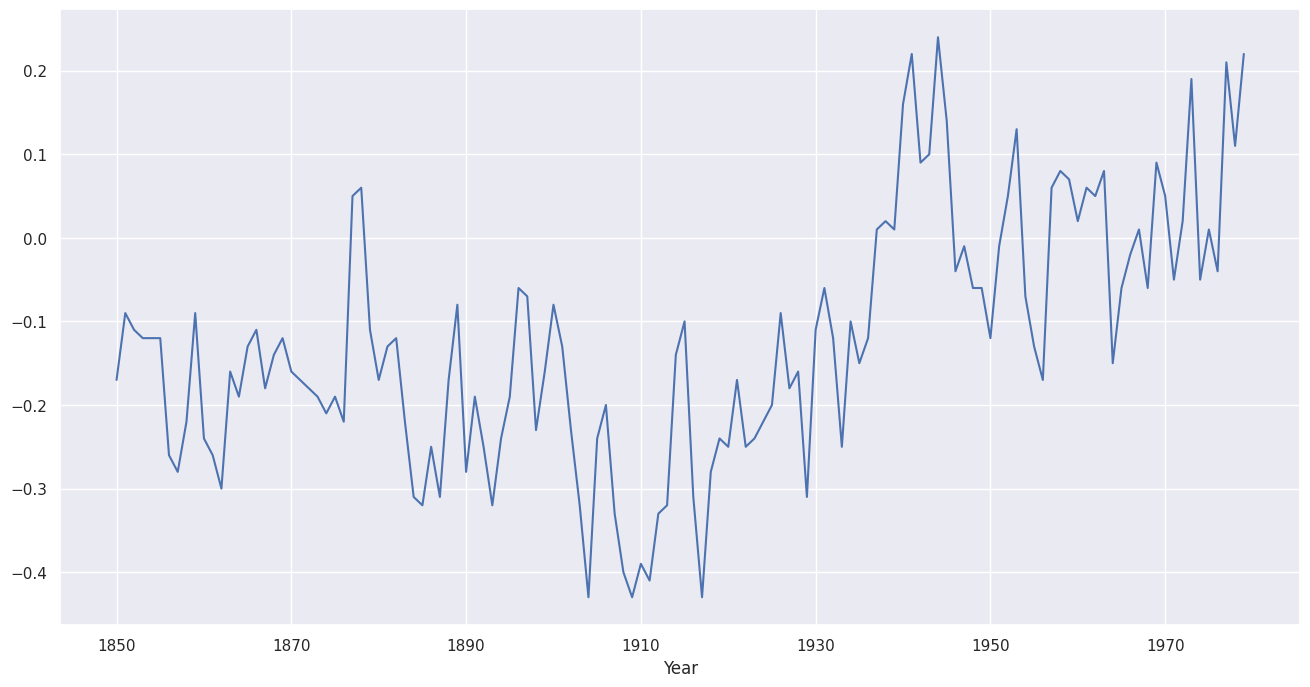

In [35]:
train_df['color'] = 'b'
train_df.set_index(time_col)[target_col].plot(figsize=figsize, color=train_df['color']);

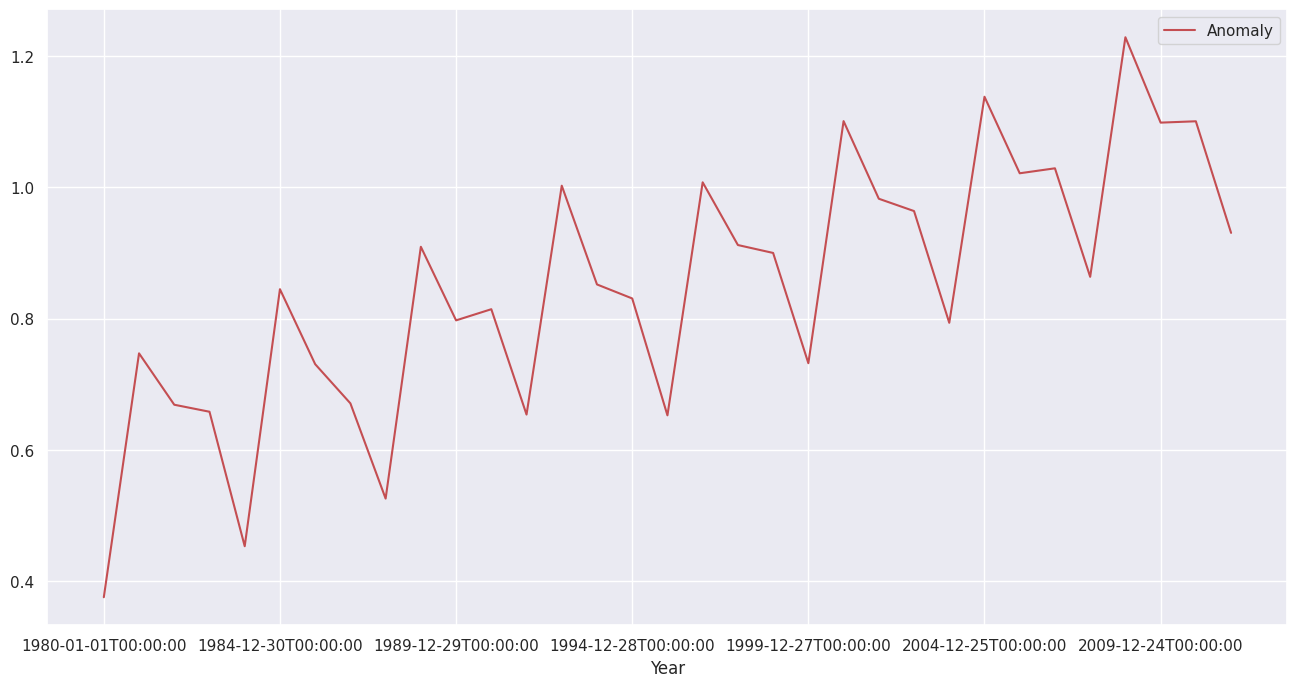

In [36]:
forecast_df['color'] = 'r'
forecast_df.set_index(time_col).plot(figsize=figsize, color=forecast_df['color']);

Combine train and test sets

In [37]:
df = pd.concat([train_df, forecast_df]).reset_index(drop=True)

In [38]:
df.shape

(163, 12)

In [39]:
df.head()

,Year,WMGHG,Ozone,Solar,Land_Use,SnowAlb_BC,Orbital,TropAerDir,TropAerInd,StratAer,Anomaly,color
0,1850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.17,b
1,1851,0.005954,0.000745,0.001166,-0.000940,0.000649,0.000653,0.000649,-0.000005,0.029088,-0.09,b
2,1852,0.010502,0.000909,-0.010756,-0.002531,0.000649,0.000671,0.000649,-0.000005,0.056712,-0.11,b
3,1853,0.014587,0.001020,-0.027220,-0.004123,0.000649,0.000688,0.000649,-0.000005,0.077260,-0.12,b
4,1854,0.020521,0.001188,-0.045539,-0.005717,0.000649,0.000689,0.000649,-0.000005,0.085759,-0.12,b


In [40]:
df.tail()

,Year,WMGHG,Ozone,Solar,Land_Use,SnowAlb_BC,Orbital,TropAerDir,TropAerInd,StratAer,Anomaly,color
158,2007-12-25T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.863700,r
159,2008-12-24T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.228360,r
160,2009-12-24T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.098416,r
161,2010-12-24T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.100457,r
162,2011-12-24T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.930597,r


Plot combined train and test sets with the vertical black line as the cut-off

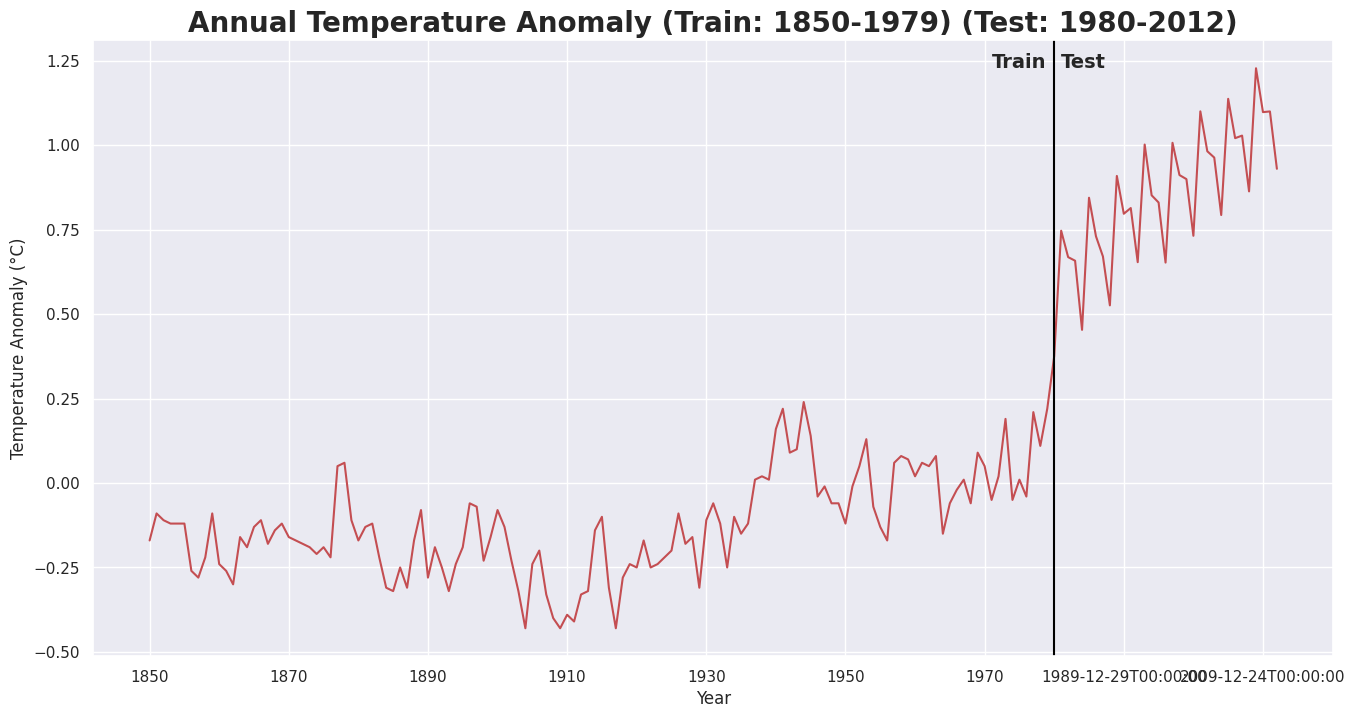

In [41]:
df.set_index(time_col)[target_col].plot(figsize=figsize, color='r')
plt.axvline(x=len(train_df), color='black', label='Train/Test set cut-off')
plt.text(x=len(train_df)-9, y=forecast_df[target_col].max(), s='Train', fontweight='bold', fontsize=14)
plt.text(x=len(train_df)+1, y=forecast_df[target_col].max(), s='Test', fontweight='bold', fontsize=14)
plt.ylabel(ylabel='Temperature Anomaly (' + u'\N{DEGREE SIGN}' + 'C)')
plt.title(label='Annual Temperature Anomaly (Train: 1850-1979) (Test: 1980-2012)', fontweight='bold', fontsize=20)
plt.show();

Plot original dataset to compare

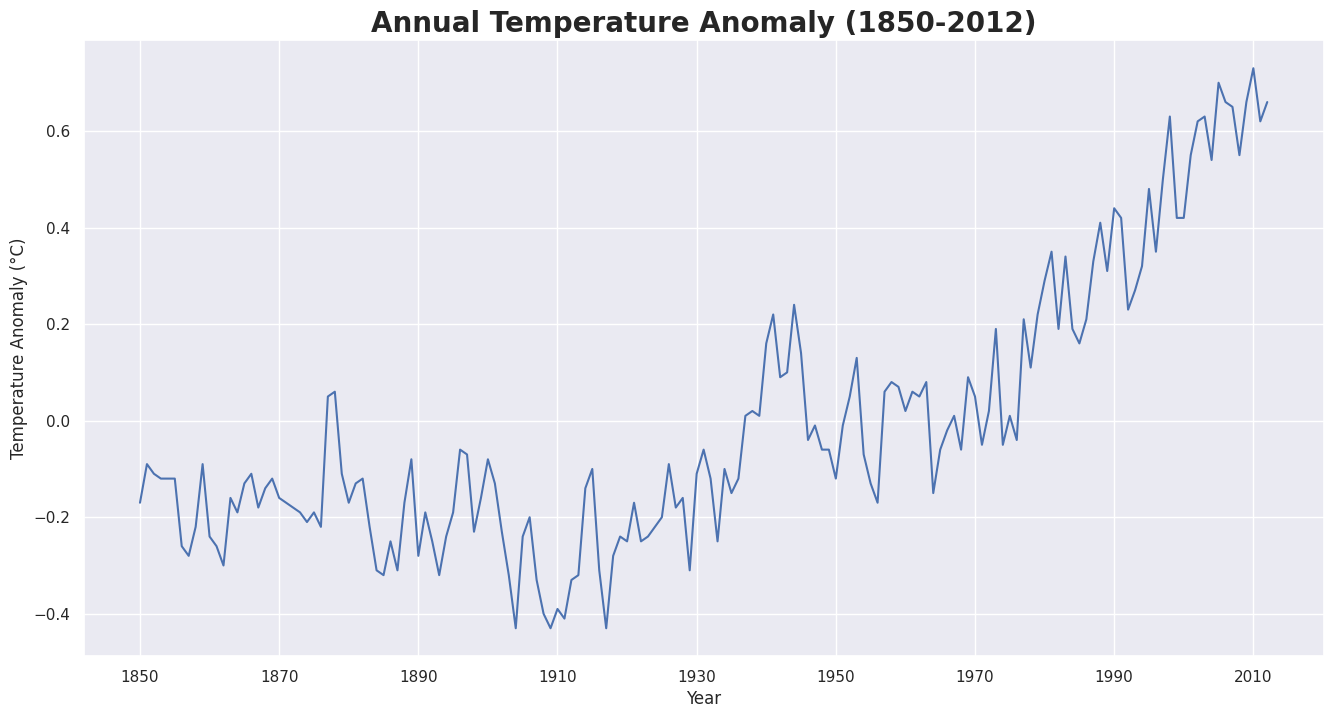

In [42]:
figsize = (16, 8)
dataset.set_index(time_col)[target_col].plot(figsize=figsize);
plt.ylabel(ylabel='Temperature Anomaly (' + u'\N{DEGREE SIGN}' + 'C)')
plt.title(label='Annual Temperature Anomaly (1850-2012)', fontweight='bold', fontsize=20)
plt.show();

Plot original dataset (blue) with SYBIL forecasted values (red)

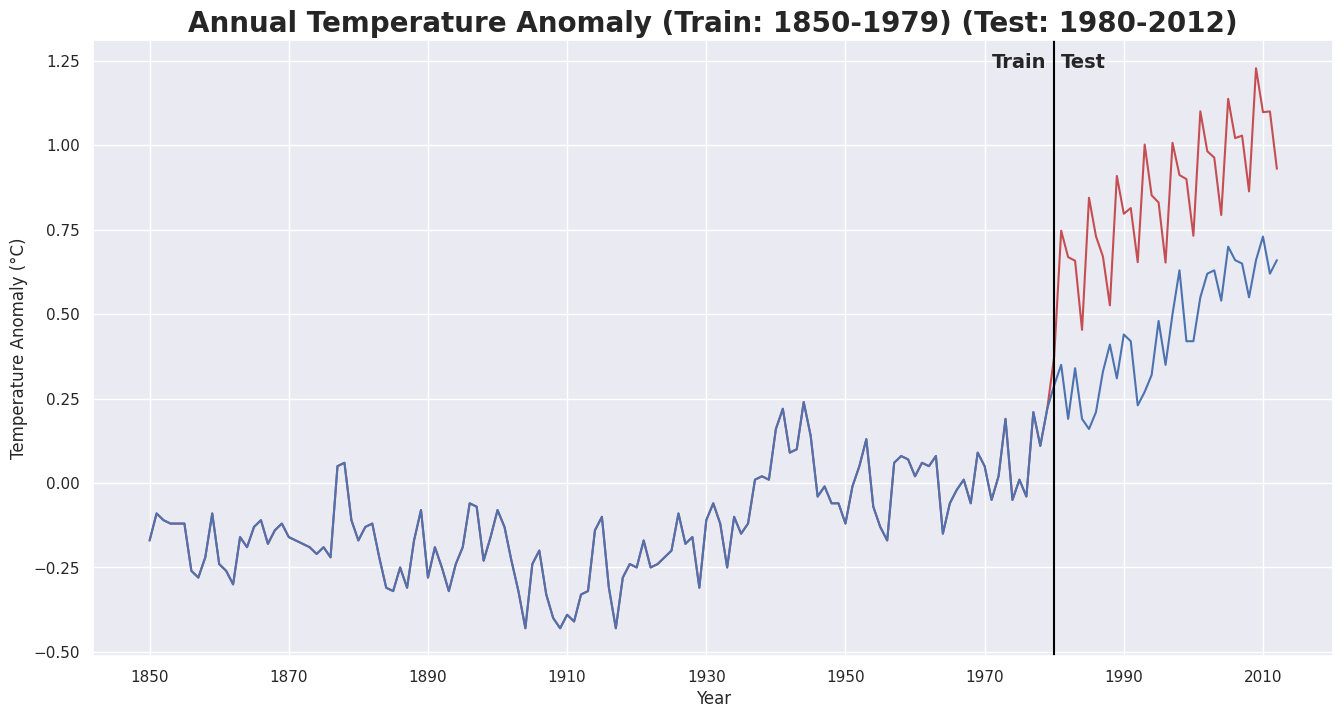

In [43]:
df.set_index(time_col)[target_col].plot(figsize=figsize, color='r')
dataset.set_index(time_col)[target_col].plot(figsize=figsize);
plt.axvline(x=len(train_df), color='black', label='Train/Test set cut-off')
plt.text(x=len(train_df)-9, y=forecast_df[target_col].max(), s='Train', fontweight='bold', fontsize=14)
plt.text(x=len(train_df)+1, y=forecast_df[target_col].max(), s='Test', fontweight='bold', fontsize=14)
plt.ylabel(ylabel='Temperature Anomaly (' + u'\N{DEGREE SIGN}' + 'C)')
plt.title(label='Annual Temperature Anomaly (Train: 1850-1979) (Test: 1980-2012)', fontweight='bold', fontsize=20)
plt.show();